# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [2]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests

# Import API key
from api_keys import geoapify_key

In [3]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,grytviken,-54.2811,-36.5092,268.33,83,98,4.63,GS,1691429819
1,1,bredasdorp,-34.5322,20.0403,284.46,83,0,1.52,ZA,1691429819
2,2,yellowknife,62.4560,-114.3525,291.44,48,75,4.63,CA,1691429820
3,3,hamilton,39.1834,-84.5333,298.76,91,100,8.75,US,1691429820
4,4,patacamaya,-17.2333,-67.9167,288.00,20,5,3.14,BO,1691429820


### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np


# Create a new figure and Cartopy axes
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True, linestyle='--')

# Set the extent to show the entire world
ax.set_extent([-180, 180, -65, 90], crs=ccrs.PlateCarree())

# Iterate through the DataFrame and plot data points
for index, row in city_data_df.iterrows():
    plt.scatter(
        row['Lng'], row['Lat'],
        s=row['Humidity'],  # Use humidity for dot size
        c=np.random.rand(3,),  # Use random colors for each dot
        transform=ccrs.PlateCarree(),
        label=row['City']
    )

# Add a title
ax.set_title("City Data on World Map")

# Show the plot
plt.show()






/var/folders/ds/jk39g9xd62v_5kxdlxcxn0800000gn/T/ipykernel_1034/3021281676.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/ds/jk39g9xd62v_5kxdlxcxn0800000gn/T/ipykernel_1034/3021281676.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world[world['geometry'].centroid.y > -65].plot(ax=ax, color='white', linewidth=0.0)


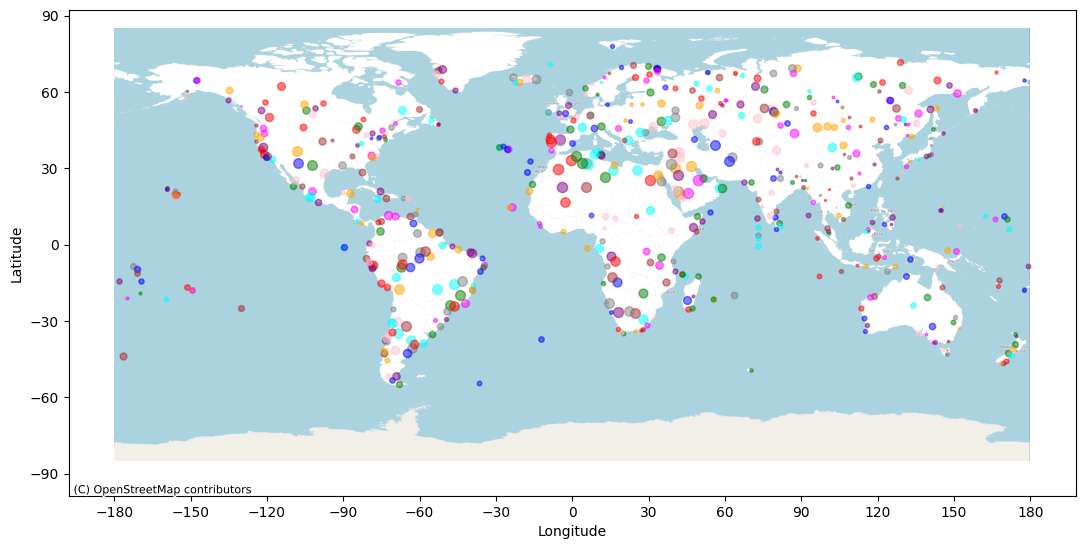

In [110]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load world map data from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(13, 10))

# Plot the world map data without country borders and labels
world.boundary.plot(ax=ax, linewidth=0)  
world[world['geometry'].centroid.y > -65].plot(ax=ax, color='white', linewidth=0.0)  

# Add latitude and longitude tickers to the axes
ax.set_xticks(range(-180, 181, 30))
ax.set_yticks(range(-90, 91, 30))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add background from OpenStreetMap using contextily
ctx.add_basemap(ax, crs=world.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Normalize humidity values for dot size
max_humidity = city_data_df['Humidity'].max()
min_humidity = city_data_df['Humidity'].min()
city_ct = city_data_df['City'].nunique()
city_data_df['Humidity'] = 1 + 55 * (city_data_df['Humidity'] - min_humidity) / (max_humidity - min_humidity)  # Normalize to [1, 61]

# Define a list of colors for each city (you can customize this list)
city_colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Plot the city data as scatter points with different colors for each city
for idx, row in city_data_df.iterrows():
    color = city_colors[idx % len(city_colors)]  # Cycle through the colors list
    ax.scatter(row['Lng'], row['Lat'], s=row['Humidity'], c=color, label=row['City'], alpha=.5)

# Display the plot
plt.show()

<module 'matplotlib.cm' from '/Users/jnorth/Library/Python/3.9/lib/python/site-packages/matplotlib/cm.py'>